# Task 5 : Credit card fraud detection

# Importing Data 

In [1]:
# import necessary dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.linear_model import LogisticRegression

In [2]:
credit_card_data = pd.read_csv(r"creditcard.csv")

# Data Analysis

In [3]:
ccd = credit_card_data

In [4]:
ccd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
ccd.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
ccd['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

# Data Visualization

Class
0    99.827251
1     0.172749
Name: Class, dtype: float64


<Axes: ylabel='Class'>

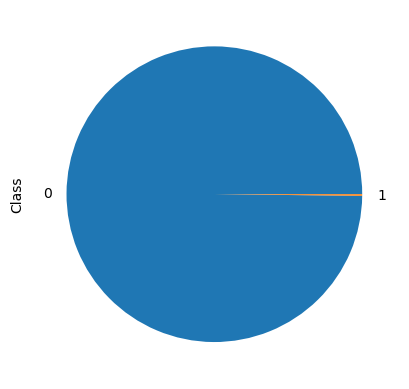

In [7]:
print((ccd.groupby('Class')['Class'].count()/ccd['Class'].count())*100)
((ccd.groupby('Class')['Class'].count()/ccd['Class'].count())*100).plot.pie()

In [8]:
classes = ccd['Class'].value_counts()
normal_value = round(classes[0]/ccd['Class'].count()*100,2)
fraud_values = round(classes[1]/ccd['Class'].count()*100,2)
print(normal_value)
print(fraud_values)

99.83
0.17


# Coorelation

In [9]:
corr = ccd.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


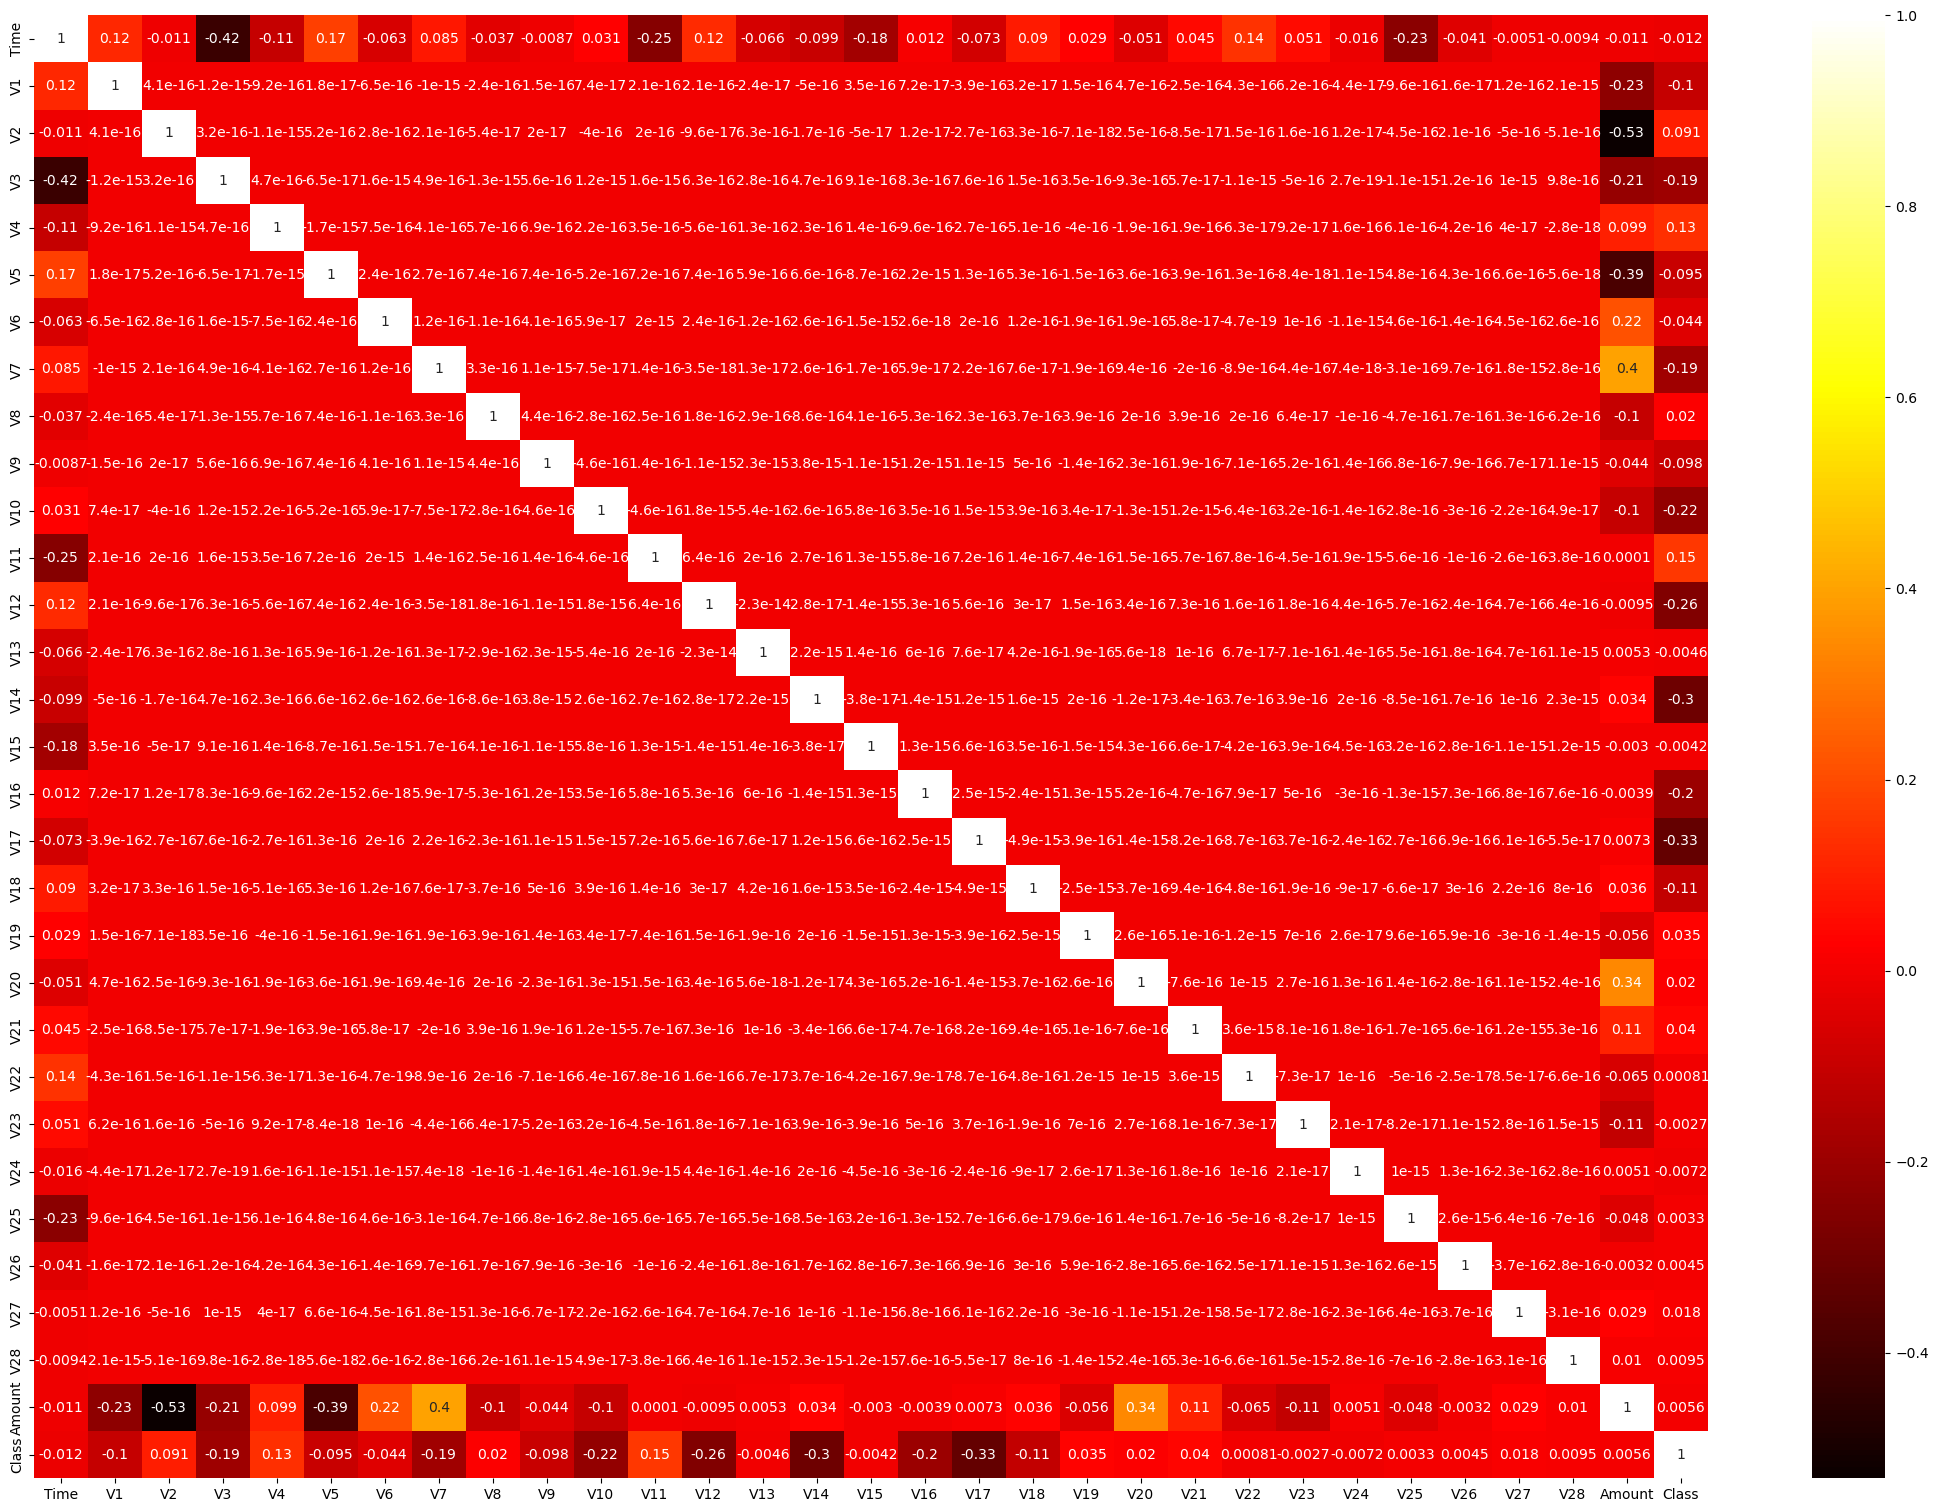

In [10]:
plt.figure(figsize=(27,19))
sns.heatmap(corr, cmap = 'hot', annot= True )
plt.show()

In [11]:
legit = ccd[ccd.Class == 0]

In [12]:
fraud = ccd[ccd.Class==1]

In [13]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [14]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [15]:
ccd.groupby('Class').describe()

Time                                                       \
          count          mean           std    min      25%      50%   
Class                                                                  
0      284315.0  94838.202258  47484.015786    0.0  54230.0  84711.0   
1         492.0  80746.806911  47835.365138  406.0  41241.5  75568.5   

                                 V1            ...       V28             \
            75%       max     count      mean  ...       75%        max   
Class                                          ...                        
0      139333.0  172792.0  284315.0  0.008258  ...  0.077962  33.847808   
1      128483.0  170348.0     492.0 -4.771948  ...  0.381152   1.779364   

         Amount                                                              
          count        mean         std  min   25%    50%     75%       max  
Class                                                                        
0      284315.0   88.291022  250.105092  0.0  5.65  22.00   77.05  25691.16  
1         492.0  122.211321  256.683288  0.0  1.00   9.25  105.89   2125.87  

[2 rows x 240 columns]

In [16]:
ccd.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [17]:
normal_sample = legit.sample(n=492)

In [18]:
new_dataset = pd.concat([normal_sample, fraud], axis = 0) # axis =0 species row wise joining of the datasets l

In [19]:
new_dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
236866,148995.0,2.200046,-0.768811,-1.486189,-0.989871,-0.365045,-0.908921,-0.379609,-0.325316,-0.514819,...,0.447425,1.235899,-0.011937,0.727500,0.220129,0.044020,-0.044039,-0.054727,34.90,0
99886,67322.0,0.902336,-1.285572,-0.084767,-0.384313,-1.075911,-0.339861,-0.209541,-0.005236,-0.908853,...,-0.245088,-0.635803,-0.130718,0.259811,0.184457,1.073202,-0.103473,0.020055,214.98,0
261061,159848.0,1.908275,-0.261210,-2.075592,0.546594,0.214328,-1.607688,0.832188,-0.531938,0.517028,...,0.181404,0.485546,-0.151974,0.073693,0.487141,-0.078215,-0.078407,-0.059070,104.07,0
156967,109267.0,2.115831,0.051819,-1.209466,0.456302,0.274373,-0.770119,0.080642,-0.374959,1.863583,...,-0.484966,-1.006503,0.266535,-0.713932,-0.226627,0.200057,-0.097753,-0.073369,0.89,0
64479,51161.0,1.164903,0.670789,0.215463,2.425114,0.123035,-0.647572,0.447997,-0.129781,-1.272538,...,0.047957,0.055445,-0.090497,0.524335,0.658558,0.039551,-0.046321,0.001728,6.54,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [20]:
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [21]:
new_dataset.groupby('Class').mean() 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95107.306911,0.190241,-0.040103,0.015195,-0.052804,-0.007351,-0.133415,-0.050243,0.085436,0.013311,...,-0.020860,0.009817,0.026931,0.004856,-0.009241,0.034377,-0.000607,0.023380,0.011044,70.116077
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [22]:
# here we can drop the time feature and instead use a derived column using timedelta function of pandas to represent the duration that is difference between two time values
delta_time = pd.to_timedelta(new_dataset['Time'], unit = 's')
# create the derived column
new_dataset['time_hour']=(delta_time.dt.components.hours).astype(int)
# now drop the time column
new_dataset.drop(columns='Time', axis=1, inplace = True)

In [23]:
new_dataset

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,time_hour
236866,2.200046,-0.768811,-1.486189,-0.989871,-0.365045,-0.908921,-0.379609,-0.325316,-0.514819,0.856705,...,1.235899,-0.011937,0.727500,0.220129,0.044020,-0.044039,-0.054727,34.90,0,17
99886,0.902336,-1.285572,-0.084767,-0.384313,-1.075911,-0.339861,-0.209541,-0.005236,-0.908853,0.688070,...,-0.635803,-0.130718,0.259811,0.184457,1.073202,-0.103473,0.020055,214.98,0,18
261061,1.908275,-0.261210,-2.075592,0.546594,0.214328,-1.607688,0.832188,-0.531938,0.517028,-0.017712,...,0.485546,-0.151974,0.073693,0.487141,-0.078215,-0.078407,-0.059070,104.07,0,20
156967,2.115831,0.051819,-1.209466,0.456302,0.274373,-0.770119,0.080642,-0.374959,1.863583,-0.297855,...,-1.006503,0.266535,-0.713932,-0.226627,0.200057,-0.097753,-0.073369,0.89,0,6
64479,1.164903,0.670789,0.215463,2.425114,0.123035,-0.647572,0.447997,-0.129781,-1.272538,0.915078,...,0.055445,-0.090497,0.524335,0.658558,0.039551,-0.046321,0.001728,6.54,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1,22
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1,23
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1,23
281144,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1,23


# Separating the features and target variables

In [24]:
x = new_dataset.drop('Class', axis=1)

In [25]:
y = new_dataset['Class']

In [26]:
x.shape

(984, 30)

In [27]:
y.shape

(984,)

# Splitting the data into training and testing data 

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 3, stratify = y)

In [29]:
cols = list(x.columns.values)

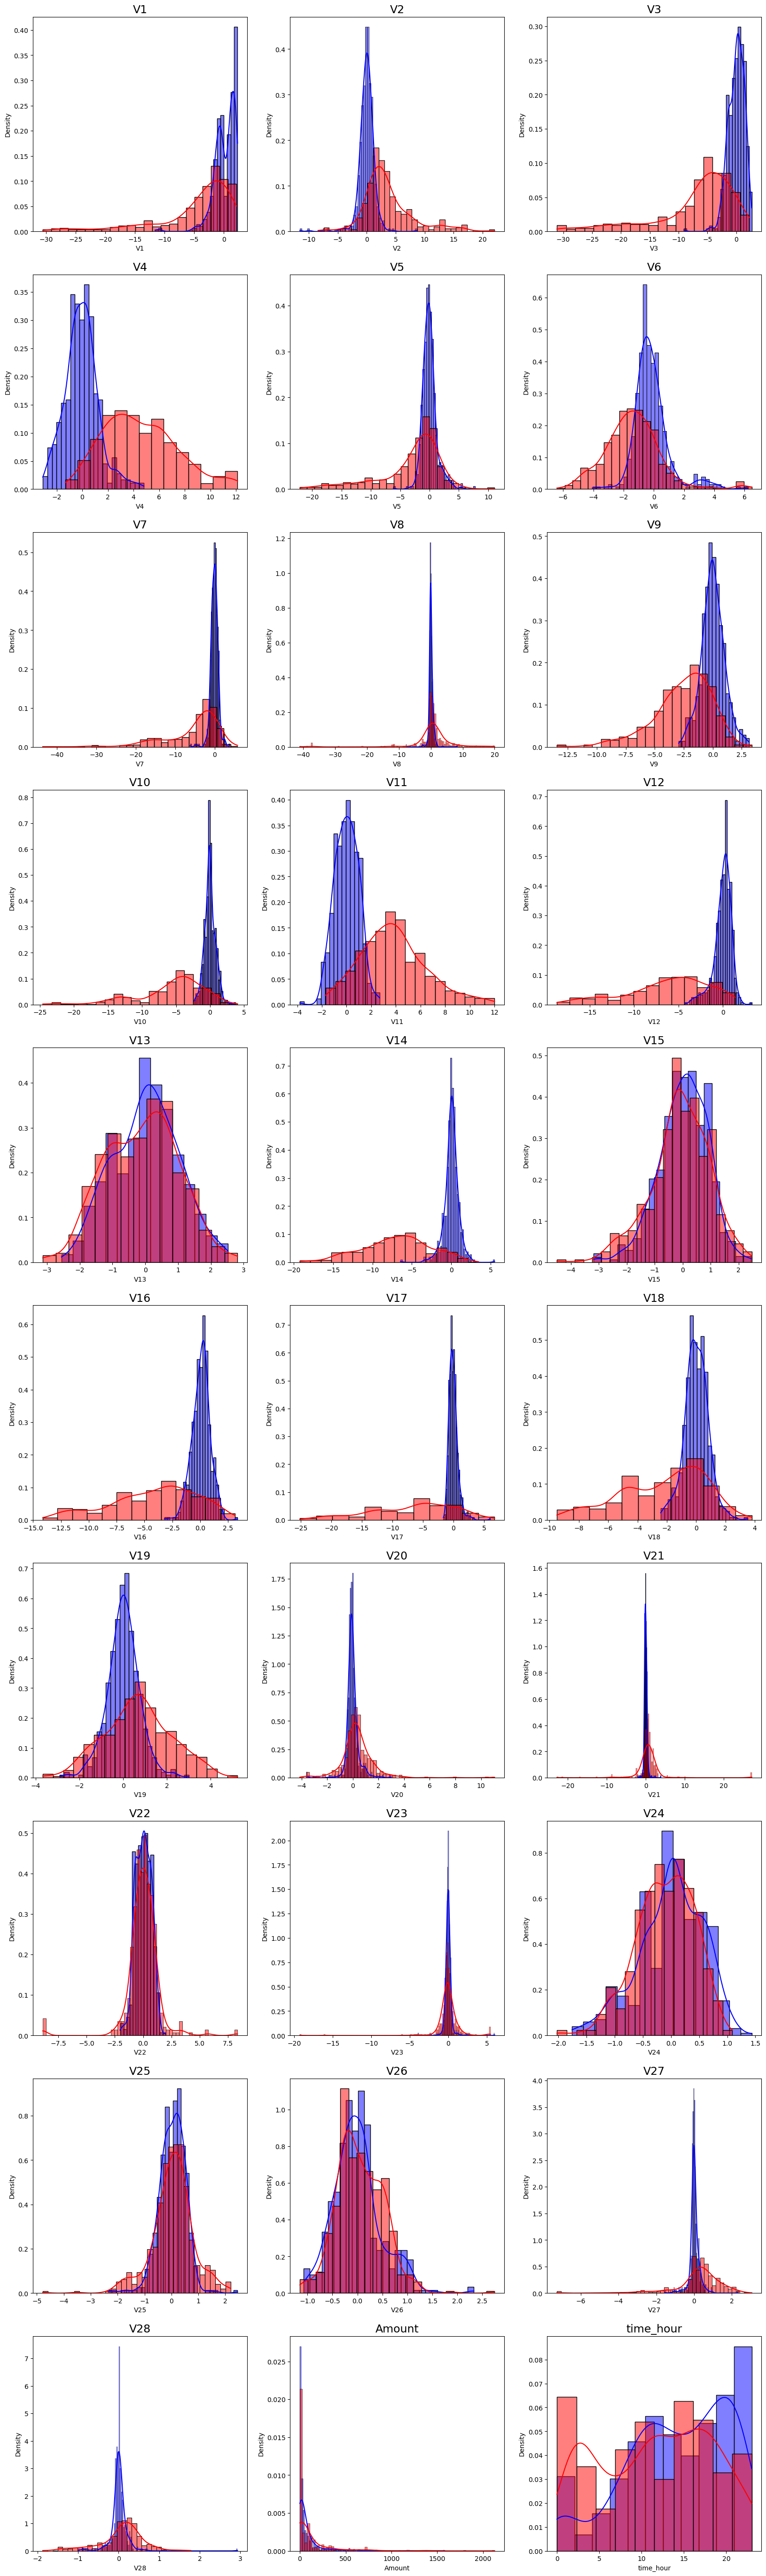

In [30]:
normal_entries = new_dataset.Class==0
fraud_entries = new_dataset.Class==1

plt.figure(figsize=(20,70))
for n, col in enumerate(cols):
    plt.subplot(10,3,n+1)
    sns.histplot(x[col][normal_entries], color='blue', kde = True, stat = 'density')
    sns.histplot(x[col][fraud_entries], color='red', kde = True, stat = 'density')
    plt.title(col, fontsize=17)
plt.show()


In [31]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_train)
pred_test = model.predict(x_test)

C:\Users\Shantanu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Model evaluation

In [32]:
# creating confusion matrix
from sklearn.metrics import confusion_matrix
def Plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test,pred_test)
    plt.clf()
    plt.show()

    

In [33]:
acc_score= round(accuracy_score(y_pred, y_train)*100,2)

In [34]:
print('the accuracy score for training data of our model is :', acc_score)

the accuracy score for training data of our model is : 95.93


In [35]:
y_pred = model.predict(x_test)
acc_score = round(accuracy_score(y_pred, y_test)*100,2)

In [36]:
print('the accuracy score of our model is :', acc_score)

the accuracy score of our model is : 93.09


In [37]:
from sklearn import metrics

In [38]:
score = round(model.score(x_test, y_test)*100,2)
print('score of our model is :', score)

score of our model is : 93.09


# Classification Report

In [39]:
class_report = classification_report(y_pred, y_test)
print('classification report of our model: ', class_report)

classification report of our model:                precision    recall  f1-score   support

           0       0.95      0.91      0.93       128
           1       0.91      0.95      0.93       118

    accuracy                           0.93       246
   macro avg       0.93      0.93      0.93       246
weighted avg       0.93      0.93      0.93       246

